# Вычисления к работе 2.1.5
### Удовин Илья, 874

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import math
%matplotlib notebook
import matplotlib.pyplot as plt

f = lambda x, a, b: a * x + b

def create_plot(s1, s2):
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linewidth=0.2)
    plt.xlabel(s1, fontsize=15)
    plt.ylabel(s2, fontsize=15)

<IPython.core.display.Javascript object>


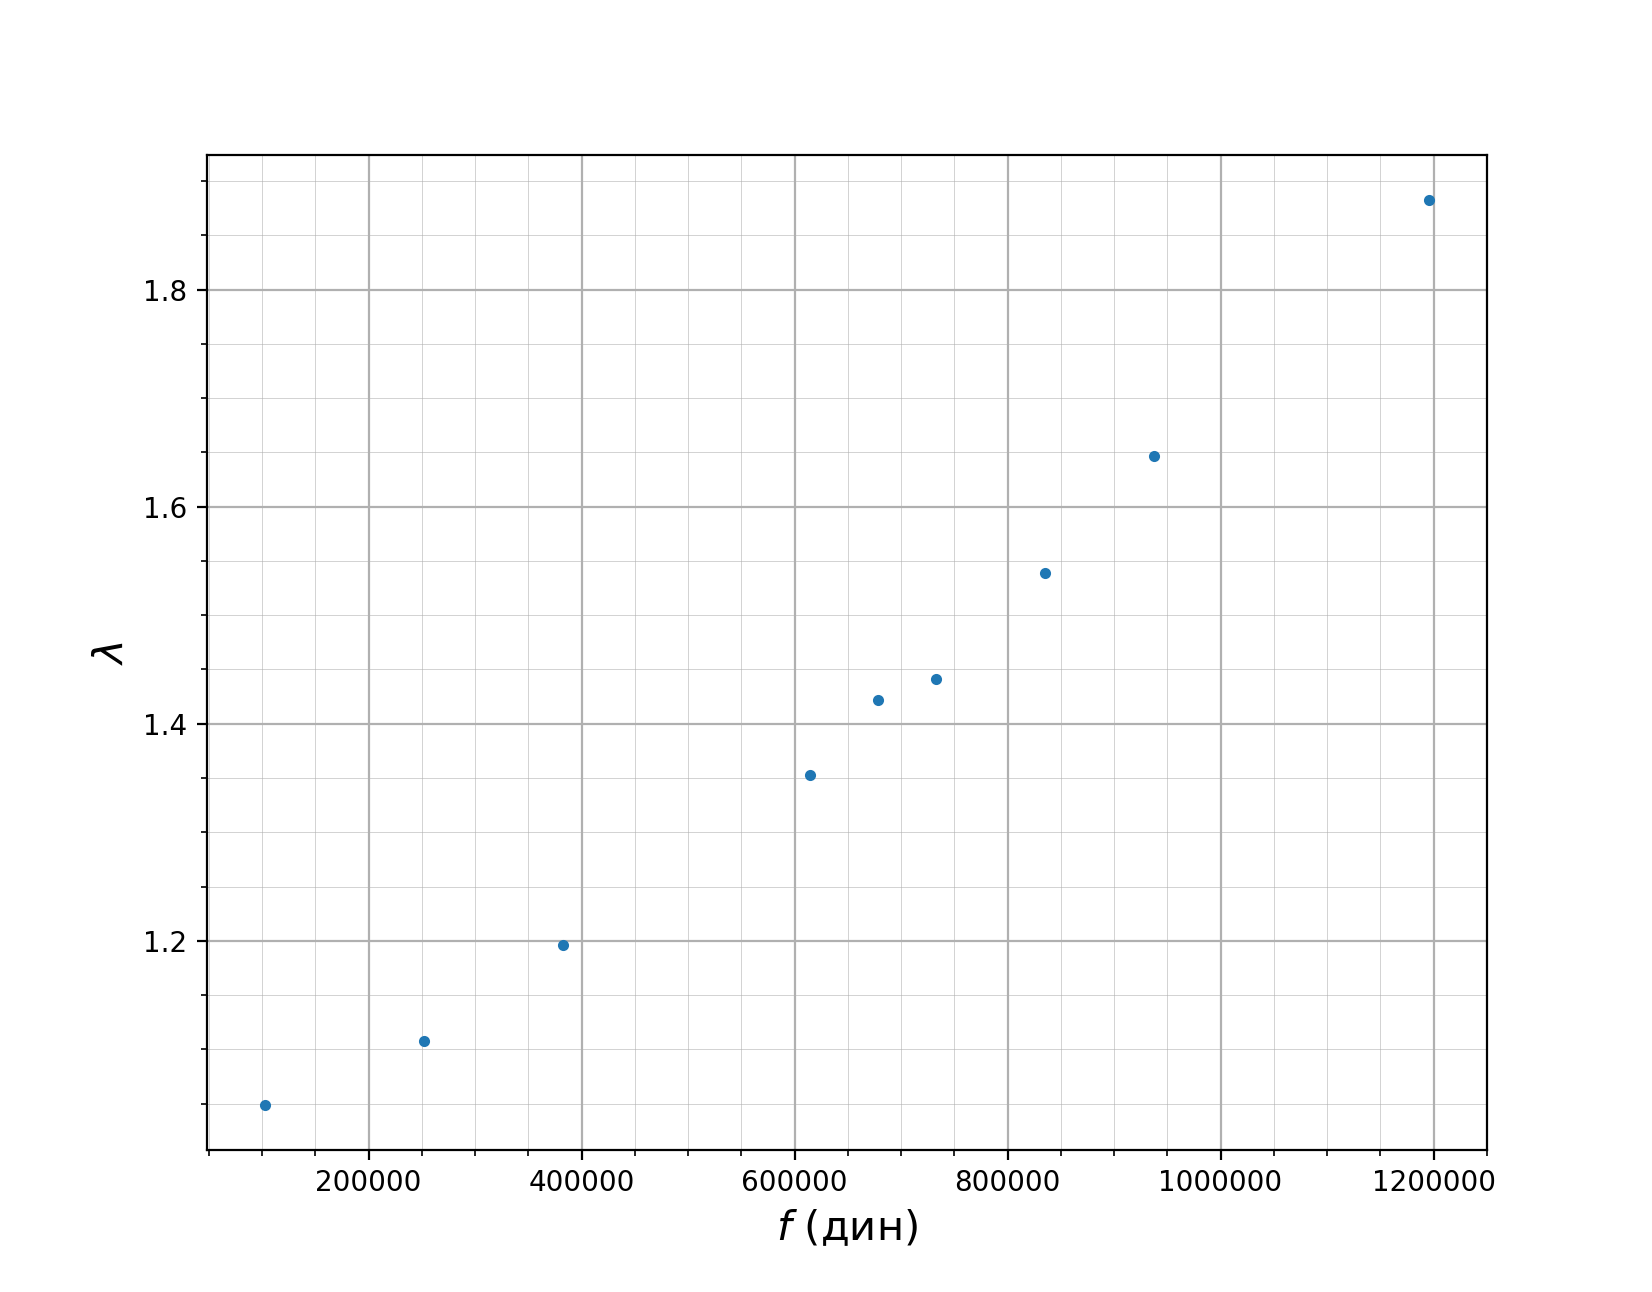

In [14]:
t1 = pd.read_csv('t1.csv', sep=';')
t1 = np.transpose(np.array(t1))
l = t1[0]
m = t1[1]
l0 = 10.2
_lambda = l / l0
mg = m * 1000
create_plot('$f$ (дин)', '$\lambda$')
plt.plot(mg, _lambda, linestyle='', marker='.')

<IPython.core.display.Javascript object>


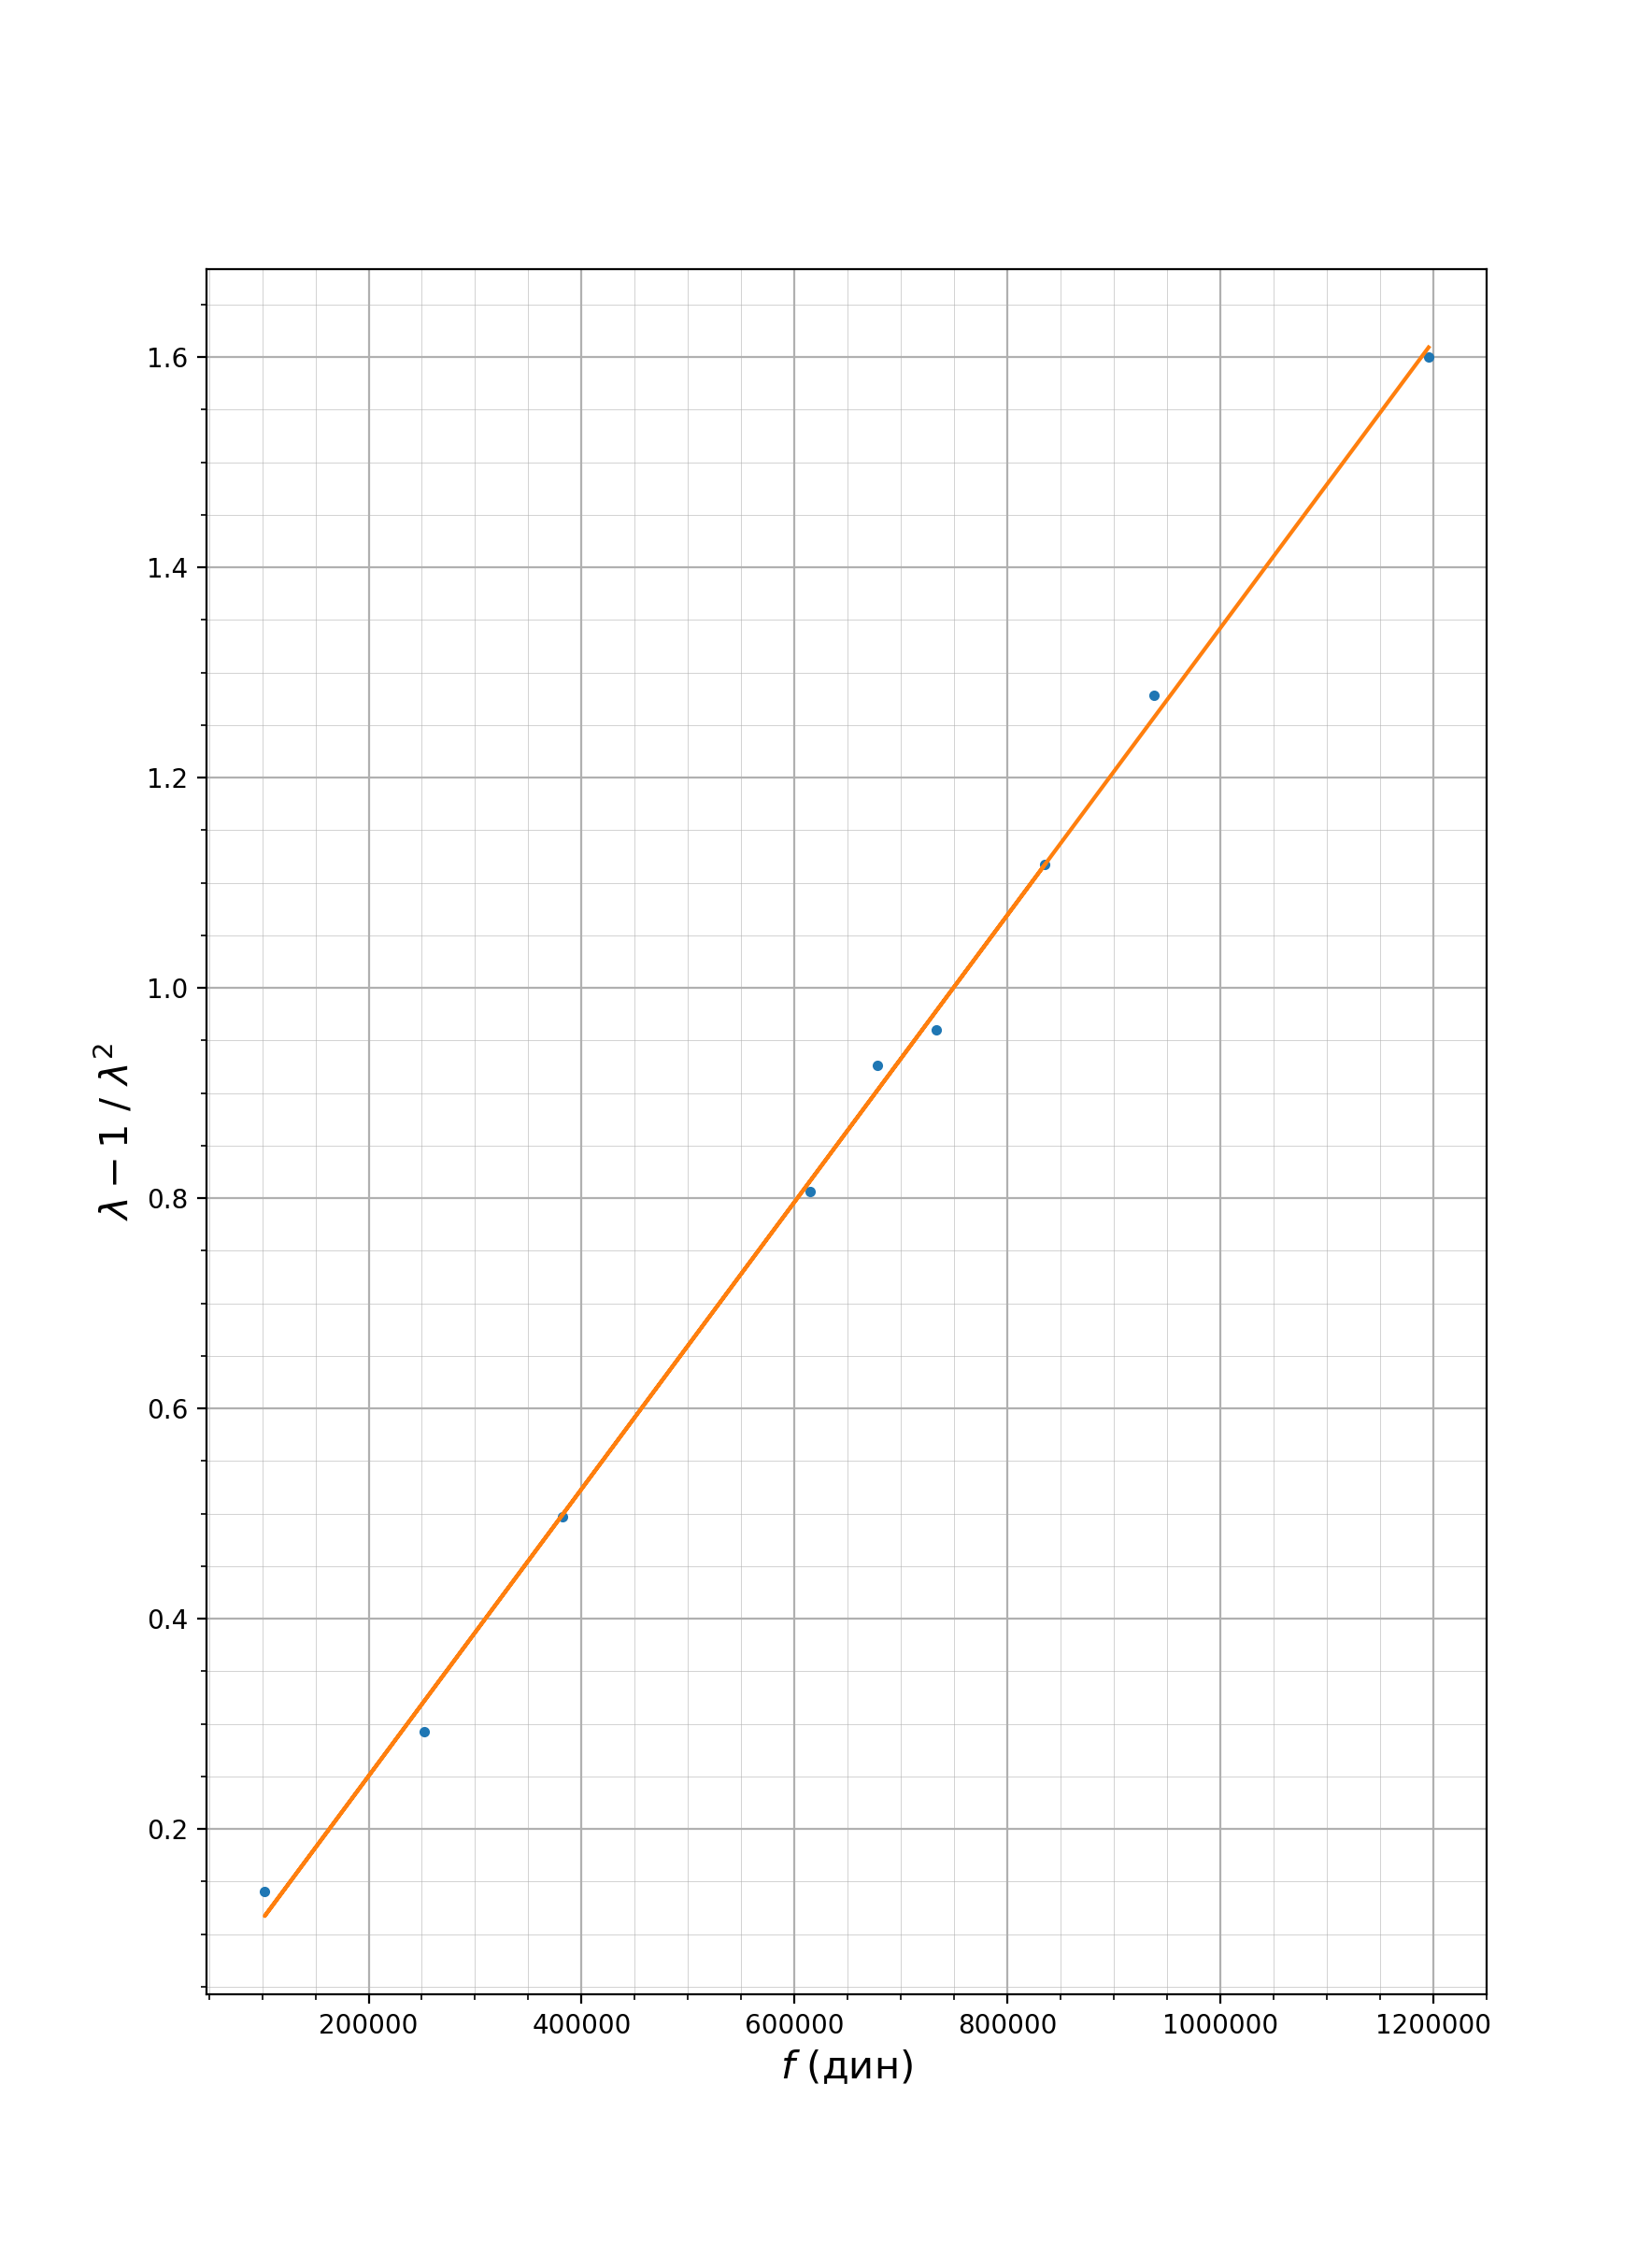

In [3]:
create_plot('$f$ (дин)', '$\lambda - 1\ /\ \lambda^2$')
y = _lambda - 1/(_lambda * _lambda) 
plt.plot(mg, y, linestyle='', marker='.')
opt1, cov1 = curve_fit(f, mg, y)
plt.plot(mg, f(mg, *opt1))

## Из графика найдем модуль Юнга для резины

In [4]:
print(opt1)
sigma0 = 1.2 * .2
E = 3 / (sigma0 * opt1[0])
print(E)

[ 1.36507026e-06 -2.25188042e-02]
9157037.808469871


$$\frac{3}{E\sigma_0} \approx 1.365\cdot 10^{-6} \ \text{дин}^{-1}$$

$$E \approx 9,157\cdot 10^6 \ \frac{\text{дин}}{\text{см}^2}$$

In [5]:
l_0 = 10.2

d = {}

d1 = pd.read_csv('DS0001AAAAAAAA.CSV', header=None)
d1 = d1.drop([1, 2], axis=1)
d1 = d1.drop(range(27), axis=0)

d1 = np.transpose(d1)
d['U19.5'] = np.array(d1, dtype=float)
d['U19.5'] = d['U19.5'][0]

d1 = pd.read_csv('DS0001CCCCCCCCCCC.CSV', header=None)
d1 = d1.drop([1, 2], axis=1)
d1 = d1.drop(range(27), axis=0)

d1 = np.transpose(d1)
d['U17.9'] = np.array(d1, dtype=float)
d['U17.9'] = d['U17.9'][0]

values = [19.5, 17.9]
markers = ['o', '^', 's']

for i in range(len(values)):
    d['U' + str(values[i])] -= d['U' + str(values[i])][0]
    d['U' + str(values[i])] = d['U' + str(values[i])][700:]
    for j in range(1, d['U' + str(values[i])].size):
        if (d['U' + str(values[i])][j] <= 0 or 
            abs(d['U' + str(values[i])][j] - d['U' + str(values[i])][j - 1]) > 4):
            d['U' + str(values[i])][j] = d['U' + str(values[i])][j - 1]

## Построим график $U(t)$ 

<IPython.core.display.Javascript object>


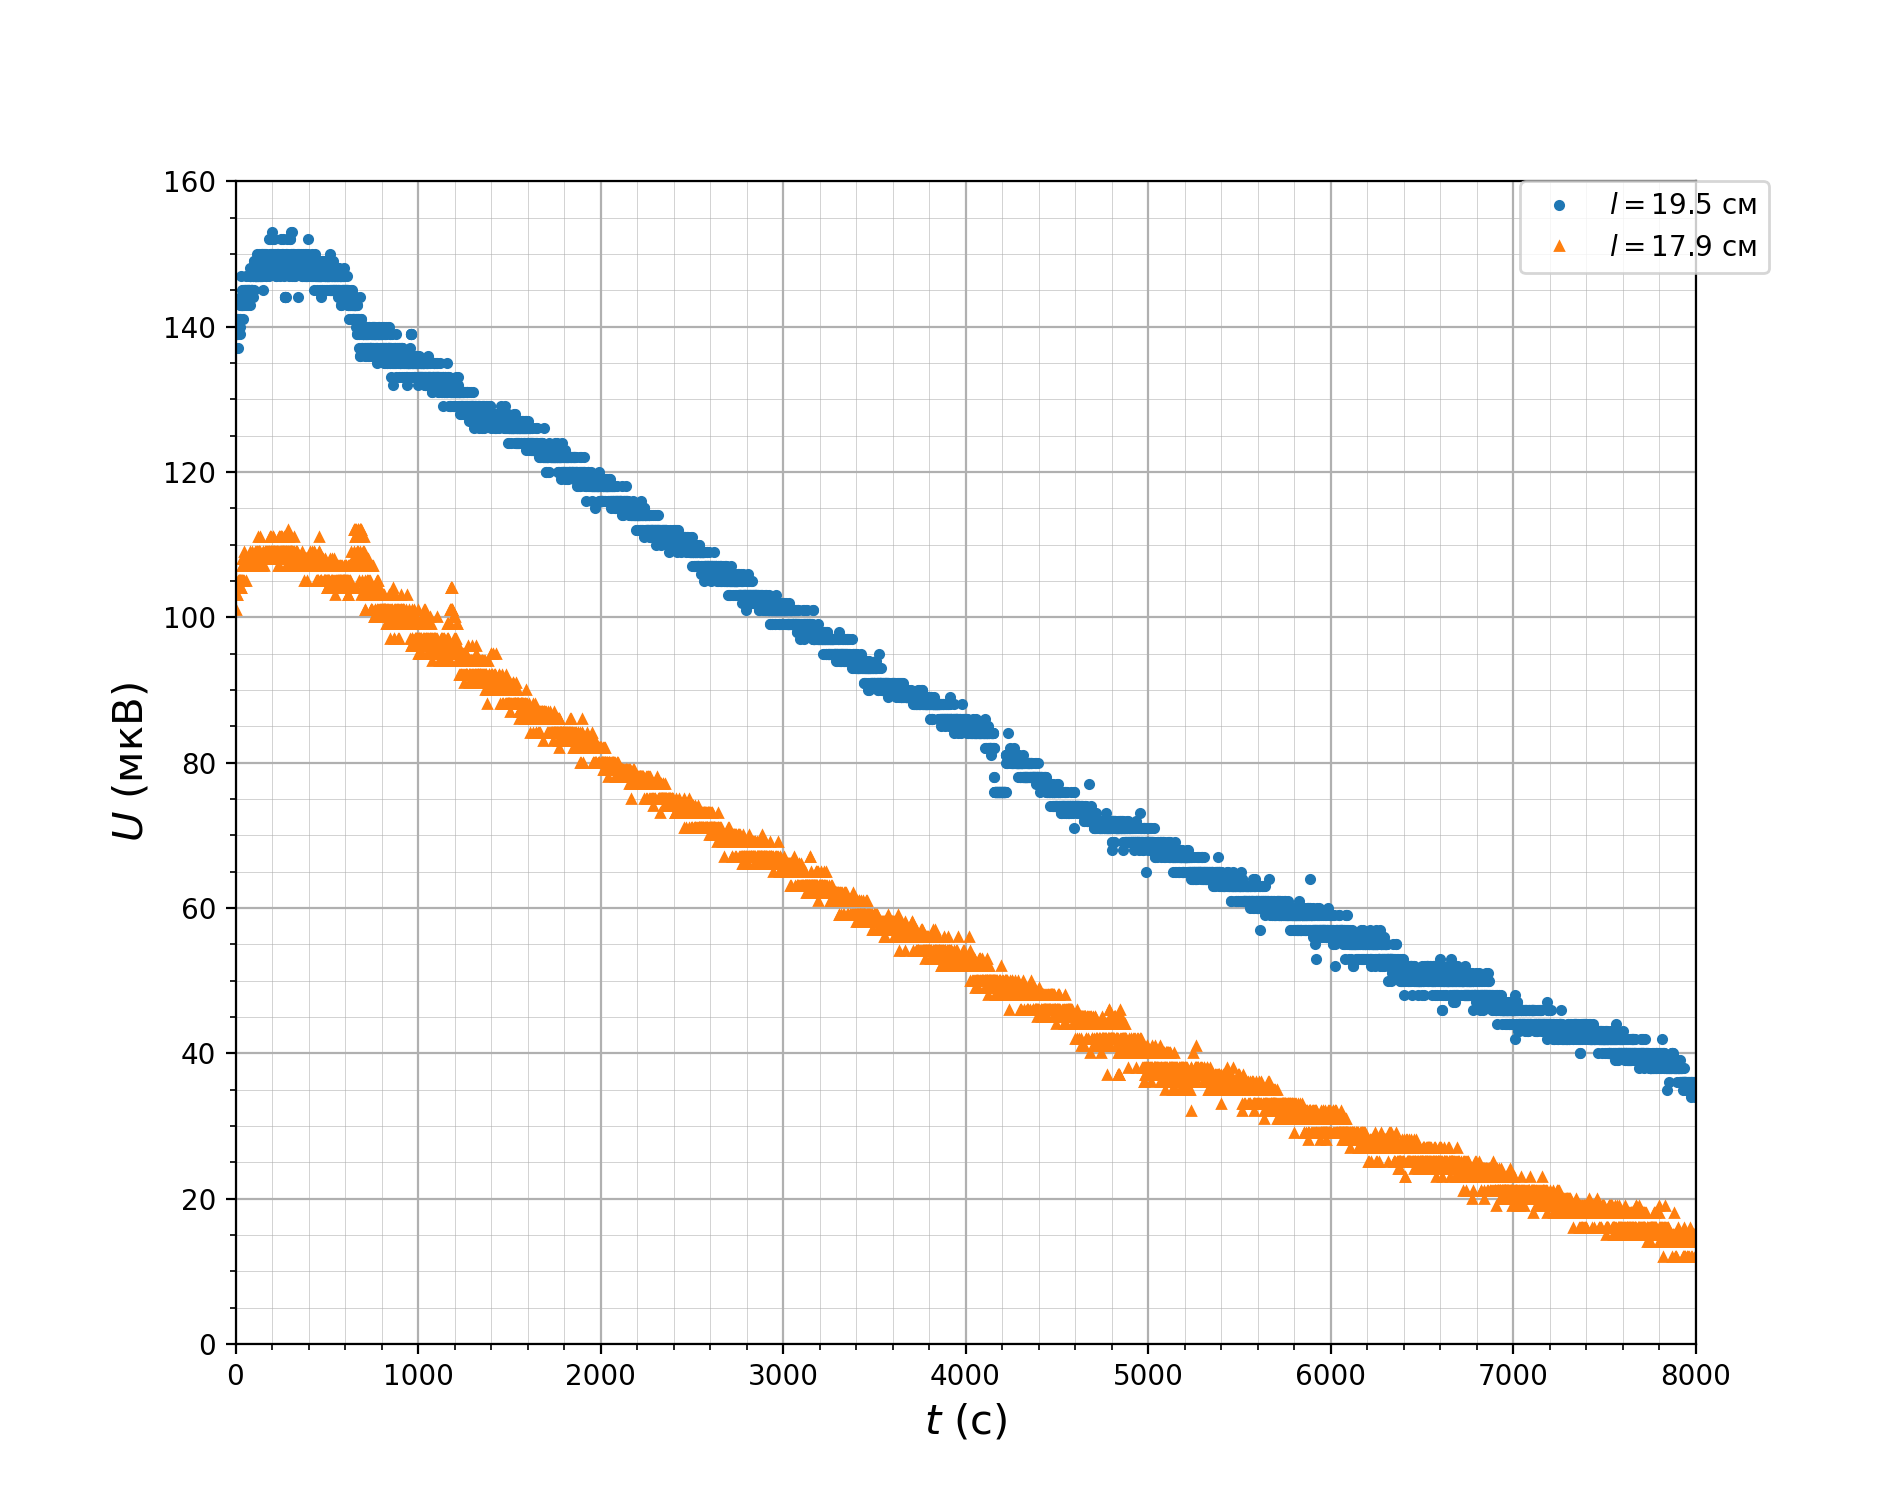

In [6]:
create_plot('$t$ (с)', '$U$ (мкВ)')
plt.xlim(0, 8000)
plt.ylim(0, 160)
xdata = np.arange(0, d['U' + str(values[0])].size / 100, .01)
xdata = np.arange(d['U' + str(values[0])].size)
for i in range(len(values)):
    plt.plot(xdata, d['U' + str(values[i])], linestyle='', marker=markers[i], markersize=3, label='$l = ' + str(values[i]) + '$ см')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)

## Построим график $\Delta T(t)$

[2.1875   2.1875   2.140625 ... 0.40625  0.40625  0.421875]
[1.578125 1.609375 1.609375 ... 0.09375  0.09375  0.09375 ]


<IPython.core.display.Javascript object>


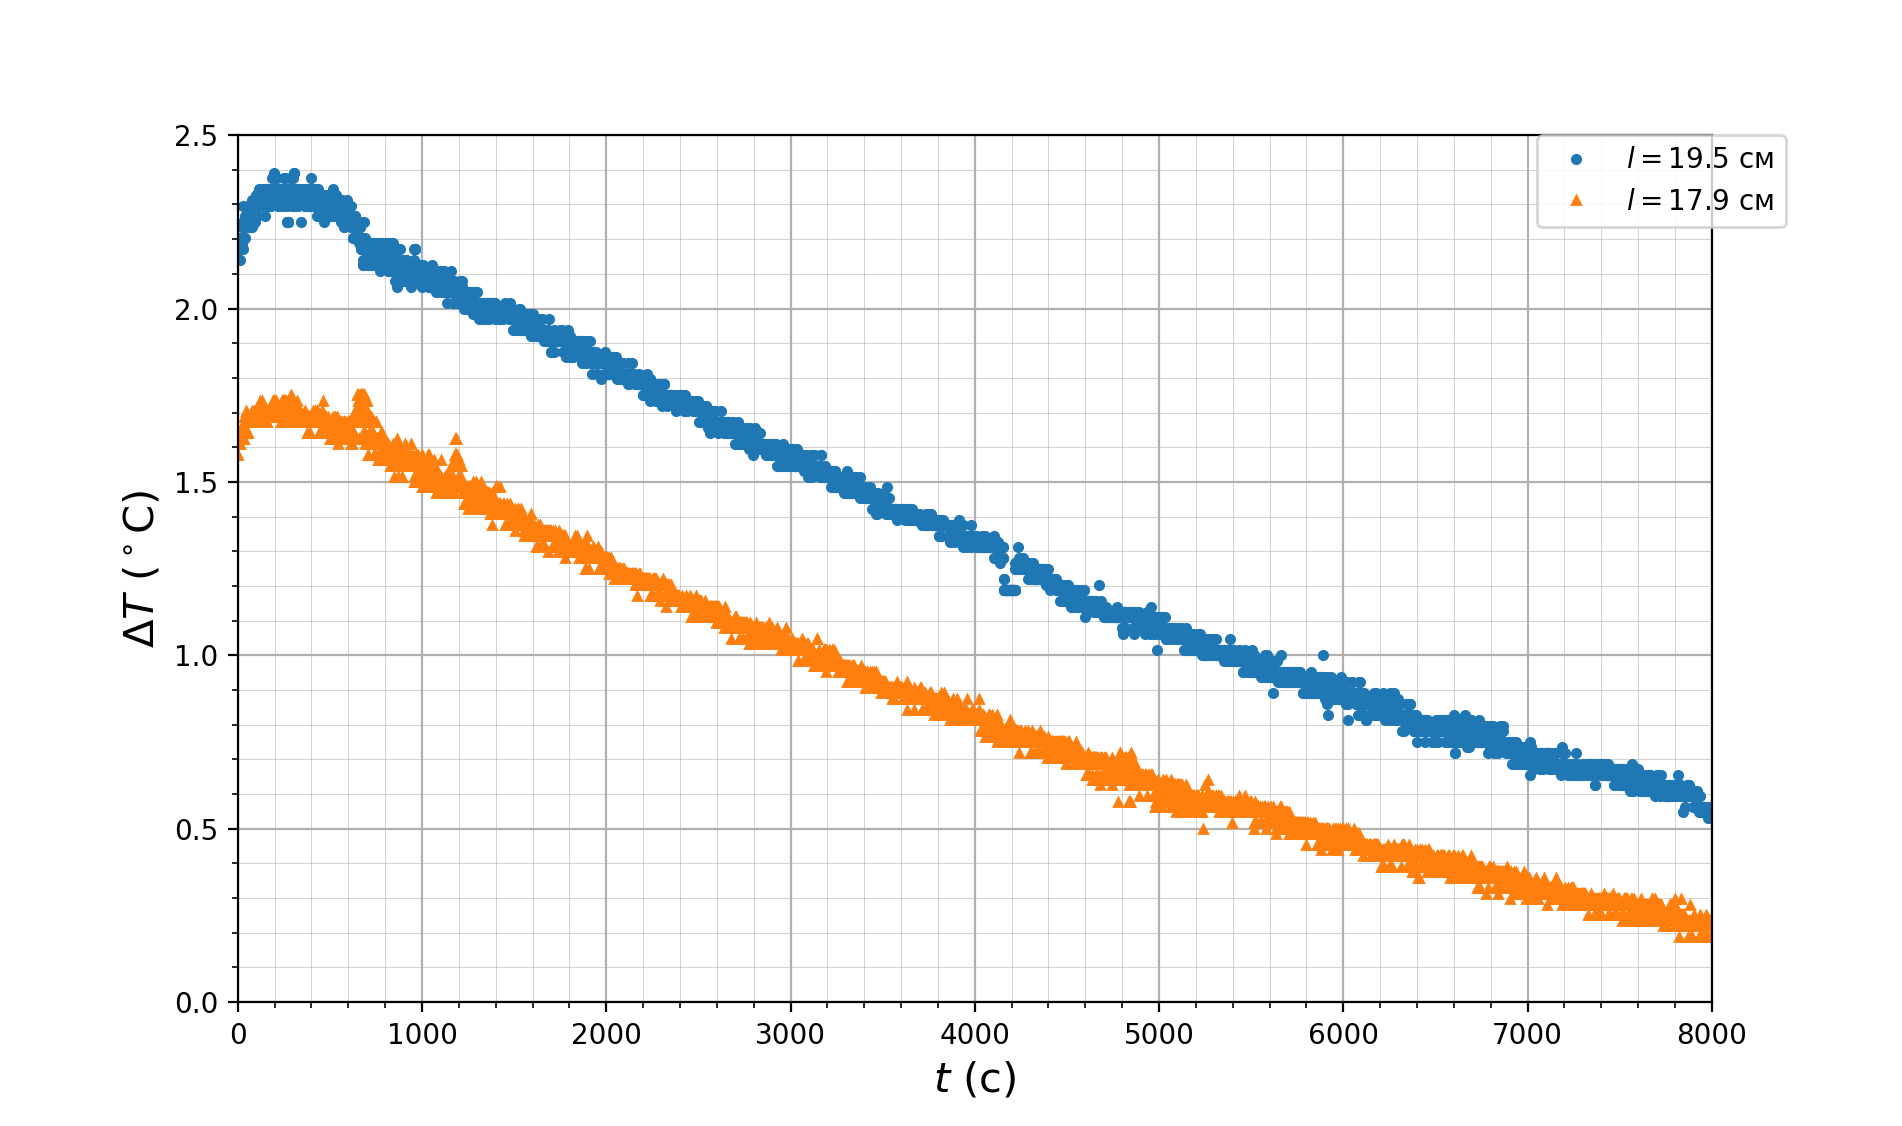

In [7]:
for l in values:
    d['T' + str(l)] = d['U' + str(l)] / 64
    print(d['T' + str(l)])
create_plot('$t$ (с)', '$\Delta T$ ($^\circ$C)')
plt.xlim(0, 8000)
plt.ylim(0, 2.5)
for i in range(len(values)):
    plt.plot(xdata, d['T' + str(values[i])], linestyle='', marker=markers[i], markersize=3, label='$l = ' + str(values[i]) + '$ см')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)

<IPython.core.display.Javascript object>


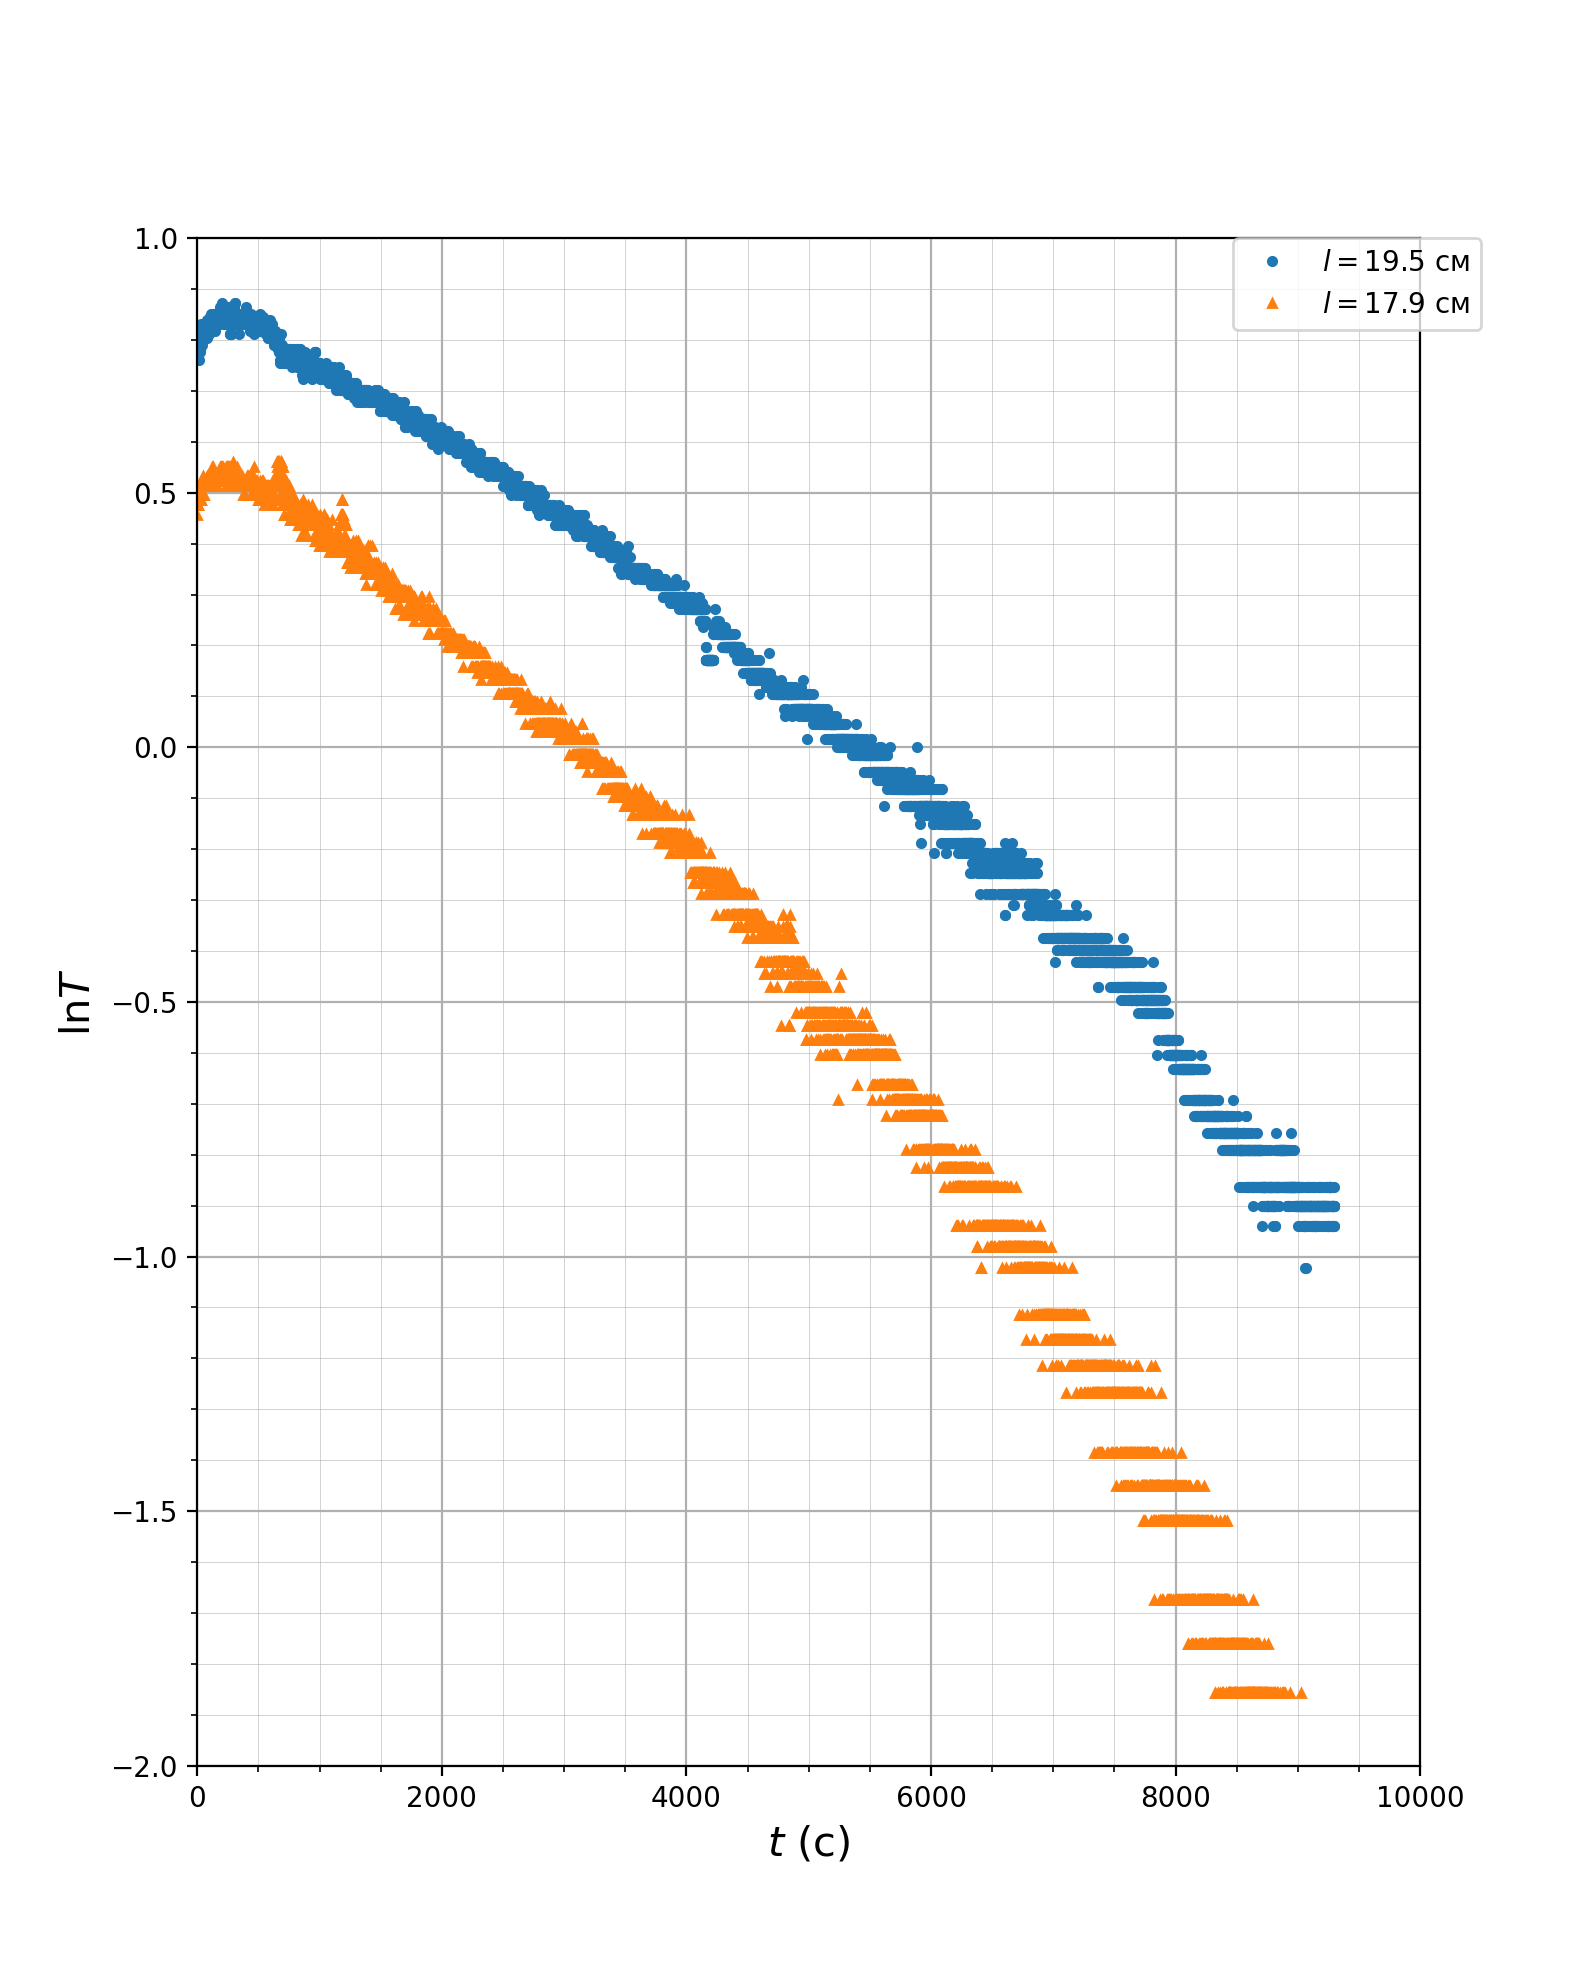

In [8]:
create_plot('$t$ (с)', '$\ln T$')
plt.xlim(0, 10000)
plt.ylim(-2, 1)
for i in range(len(values)):
    plt.plot(xdata, np.log(d['T' + str(values[i])]), linestyle='', marker=markers[i], markersize=3, label='$l = ' + str(values[i]) + '$ см')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)

<IPython.core.display.Javascript object>


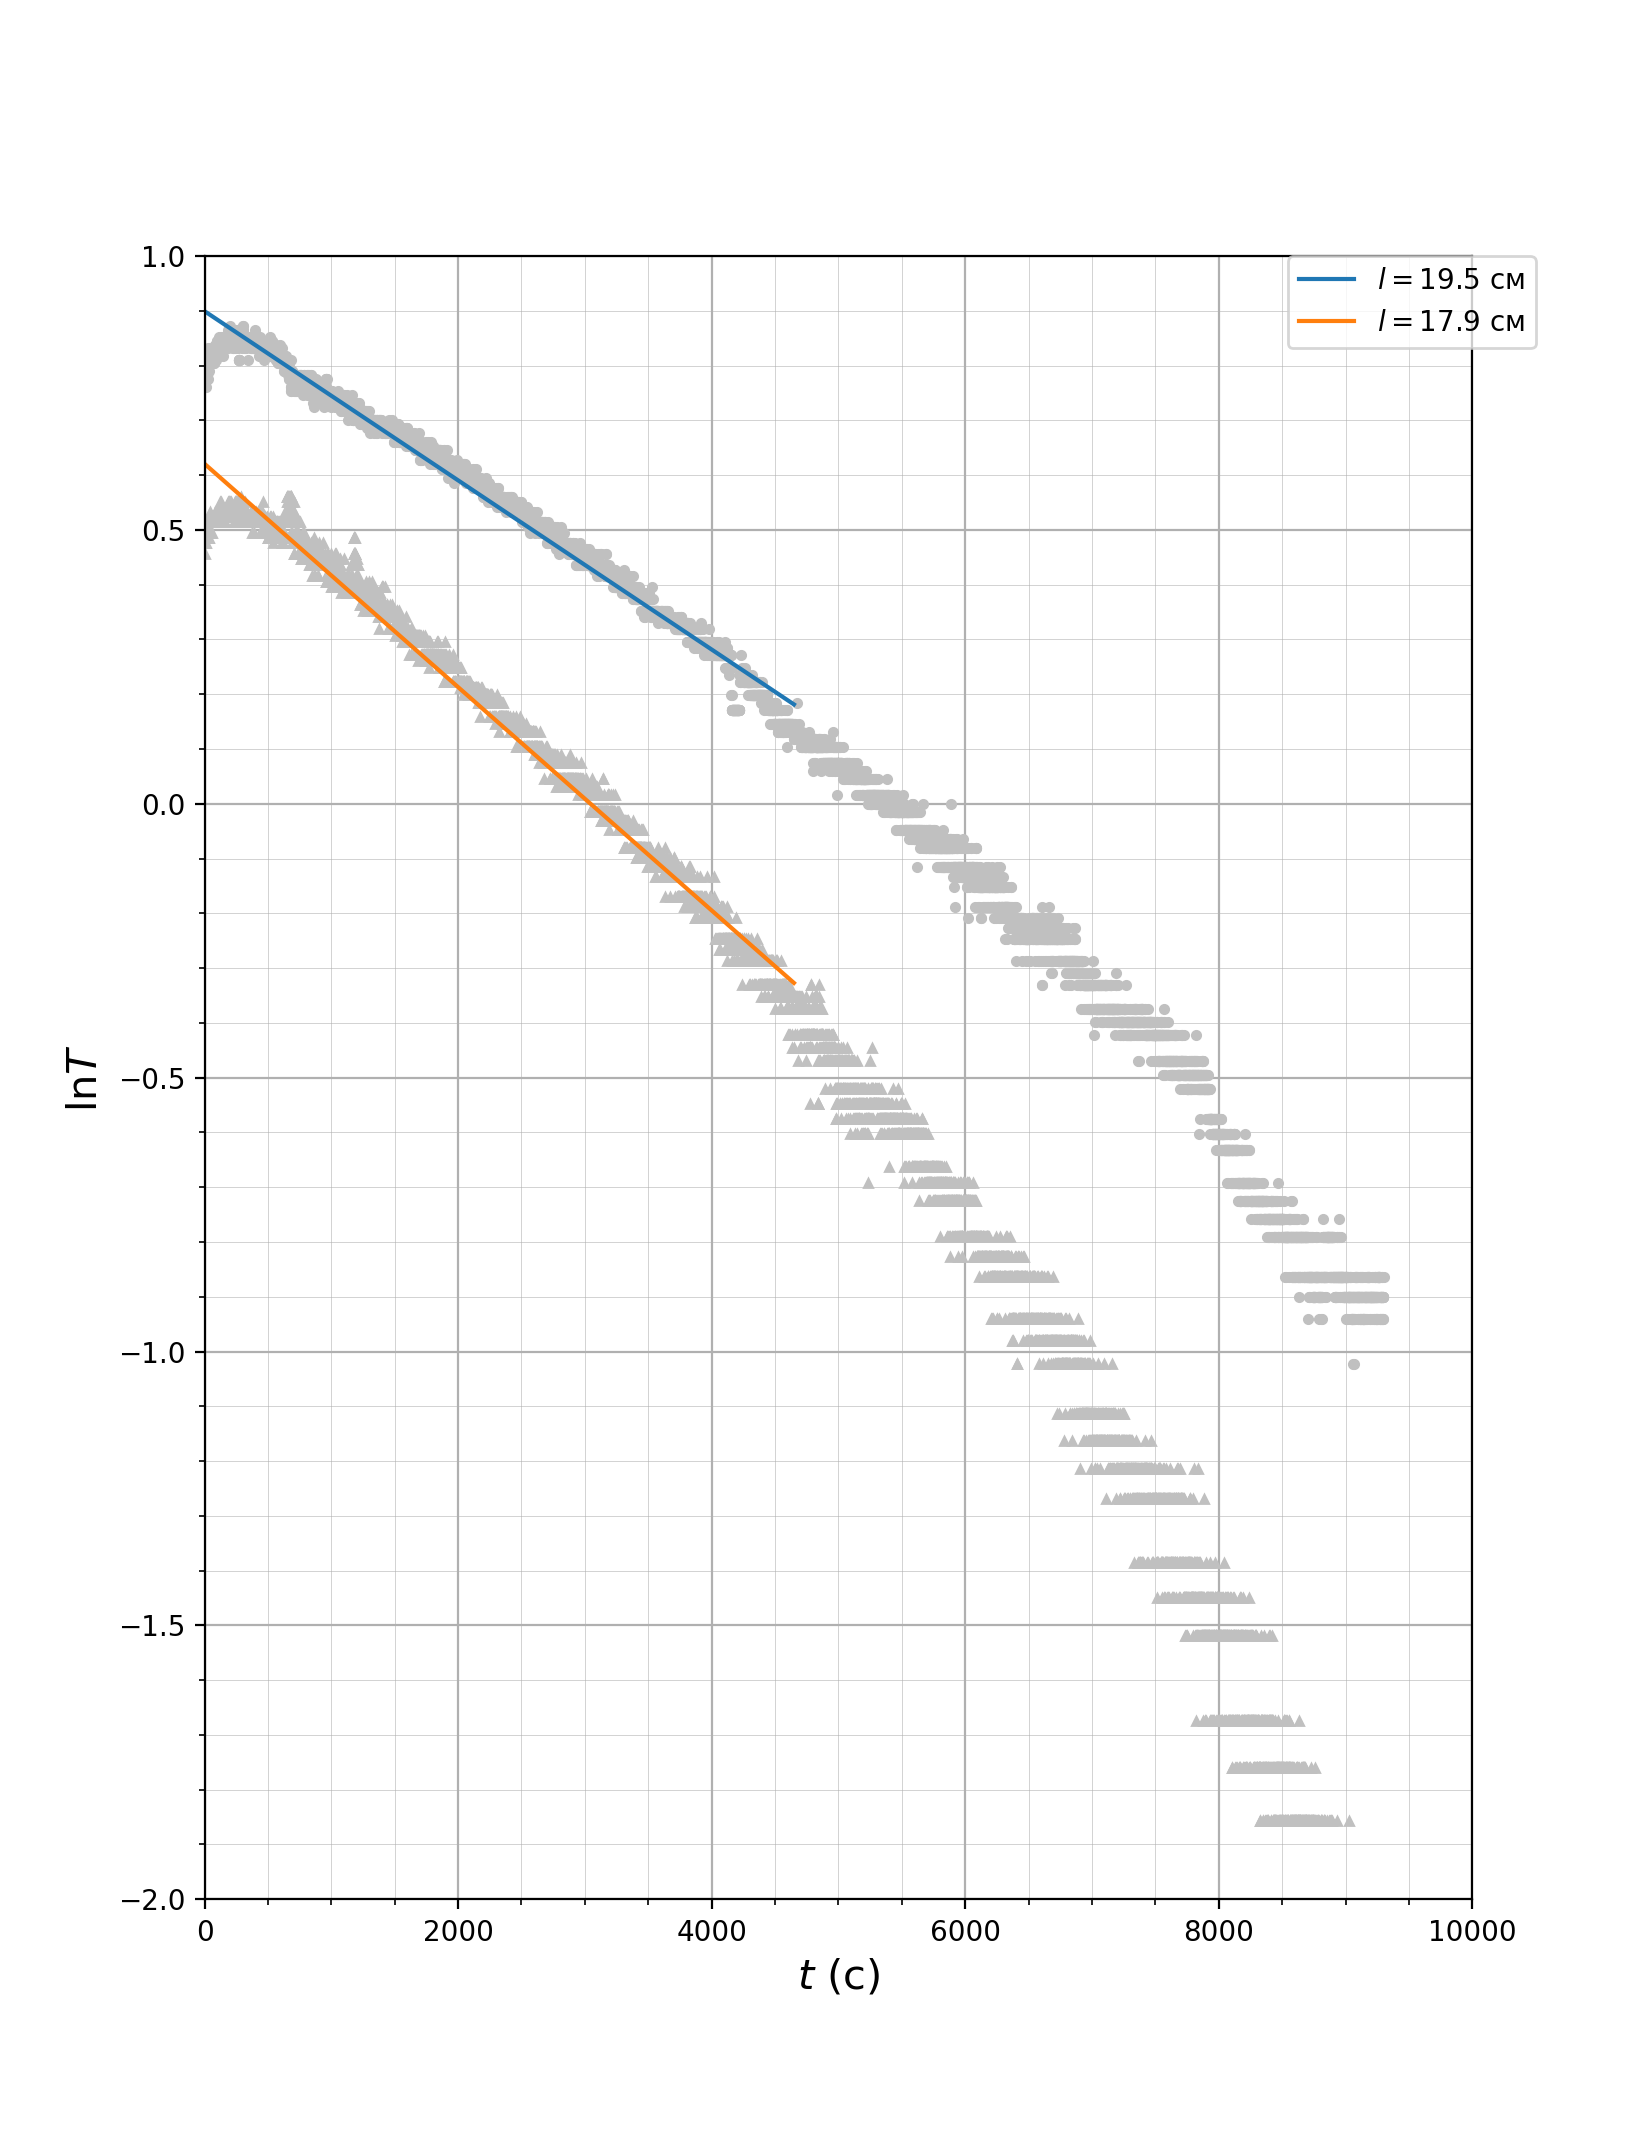

In [9]:
create_plot('$t$ (с)', '$\ln T$')
plt.xlim(0, 10000)
plt.ylim(-2, 1)
opt = []
cov = []
for i in range(len(values)):
    ydata = np.log(d['T' + str(values[i])])
    plt.plot(xdata, ydata, color='silver', linestyle='', marker=markers[i], markersize=3)
    xdata1 = xdata[:xdata.size // 2]
    ydata = ydata[:ydata.size // 2]
    opt2, cov2 = curve_fit(f, xdata1, ydata)
    d['opt' + str(values[i])] = opt2
    d['cov' + str(values[i])] = cov2
    plt.plot(xdata1, f(xdata1, *opt2), label='$l = ' + str(values[i]) + '$ см')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)

In [10]:
for i in range(len(values)):
    print(d['opt' + str(values[i])])

[-1.54446328e-04  8.99475769e-01]
[-2.03887788e-04  6.20848240e-01]


In [11]:
for i in range(len(values)):
    ln_dT0 = f(0, *d['opt' + str(values[i])])
    d['deltaT0' + str(values[i])] = math.exp(ln_dT0)
    print('l =', values[i],'см, delta T =', round(d['deltaT0' + str(values[i])], 3), 'К')

l = 19.5 см, delta T = 2.458 К
l = 17.9 см, delta T = 1.861 К


$$C = \frac{E\sigma_0l_0}{\Delta T}(\lambda - 1)\left[\lambda + 1 - \frac{2}{\lambda}(1 + 3\alpha T_0)\right]$$

In [12]:
alpha = 2.5e-4
T0 = 294
_lambda = np.array(values) / l0
A = E * sigma0 * l0
B = 1 + 3 * alpha * T0
for i in range(len(values)):
    d['C' + str(values[i])] = A * (_lambda[i] - 1) * (_lambda[i] + 1 - 2 * B / _lambda[i]) / d['deltaT0' + str(values[i])]
    print('l =', values[i],'см, C =', round(d['C' + str(values[i])], 3), 'эрг/К')
C0 = np.array([d['C' + str(values[i])] for i in range(len(values))]).mean()
print(C0)

l = 19.5 см, C = 13592897.531 эрг/К
l = 17.9 см, C = 12405709.724 эрг/К
12999303.627133776


Среднее значение
$$\left<C\right> = 1,3\cdot 10^7 \ \frac{\text{эрг}}{\text{К}}$$

## Оценим погрешность
$$\frac{\sigma_E}{E} = \sqrt{\left(\frac{\sigma_l}{l}\right)^2 + \left(\frac{\sigma_m}{m}\right)^2}$$

$$\frac{\sigma_C}{C} = \sqrt{\left(\frac{\sigma_l}{l}\right)^2 + \left(\frac{\sigma_E}{E}\right)^2}$$

In [15]:
sigma_l = .1
eps_l = sigma_l / l.mean()
sigma_m = .1
eps_m = sigma_m / m.mean()
eps_E = math.sqrt(eps_l ** 2 + eps_m ** 2)
sigma_E = eps_E * E
eps_C = math.sqrt(eps_l ** 2 + eps_E ** 2)
sigma_C = eps_C * C0
print('абс. E:', sigma_E)
print('абс. C:', sigma_C)

абс. E: 63952.04842976395
абс. C: 128374.75117247716


# Результат
$$E = (9,157 \pm 0,064)\cdot 10^6 \ \frac{\text{дин}}{\text{см}^2}$$

$$C = (1,300 \pm 0,013)\cdot 10^7 \ \frac{\text{эрг}}{\text{К}}$$

## Вывод
В ходе данной работы было исследовано упругое деформирование резиновой пленки, в том числе при больших удлинениях, когда оно становится нелинейным. Также было измерено нагревание пленки при большом адиабатическом растяжении и определена теплоемкость пленки.